# Resource

*These trivial matters—diet, locality, climate, and one’s mode of recreation, the whole casuistry of self-love—are inconceivably more important than, all that which has hitherto been held in high esteem!*          
– [Why I am so clever](https://www.gutenberg.org/files/52190/52190-h/52190-h.htm), Ecce Homo

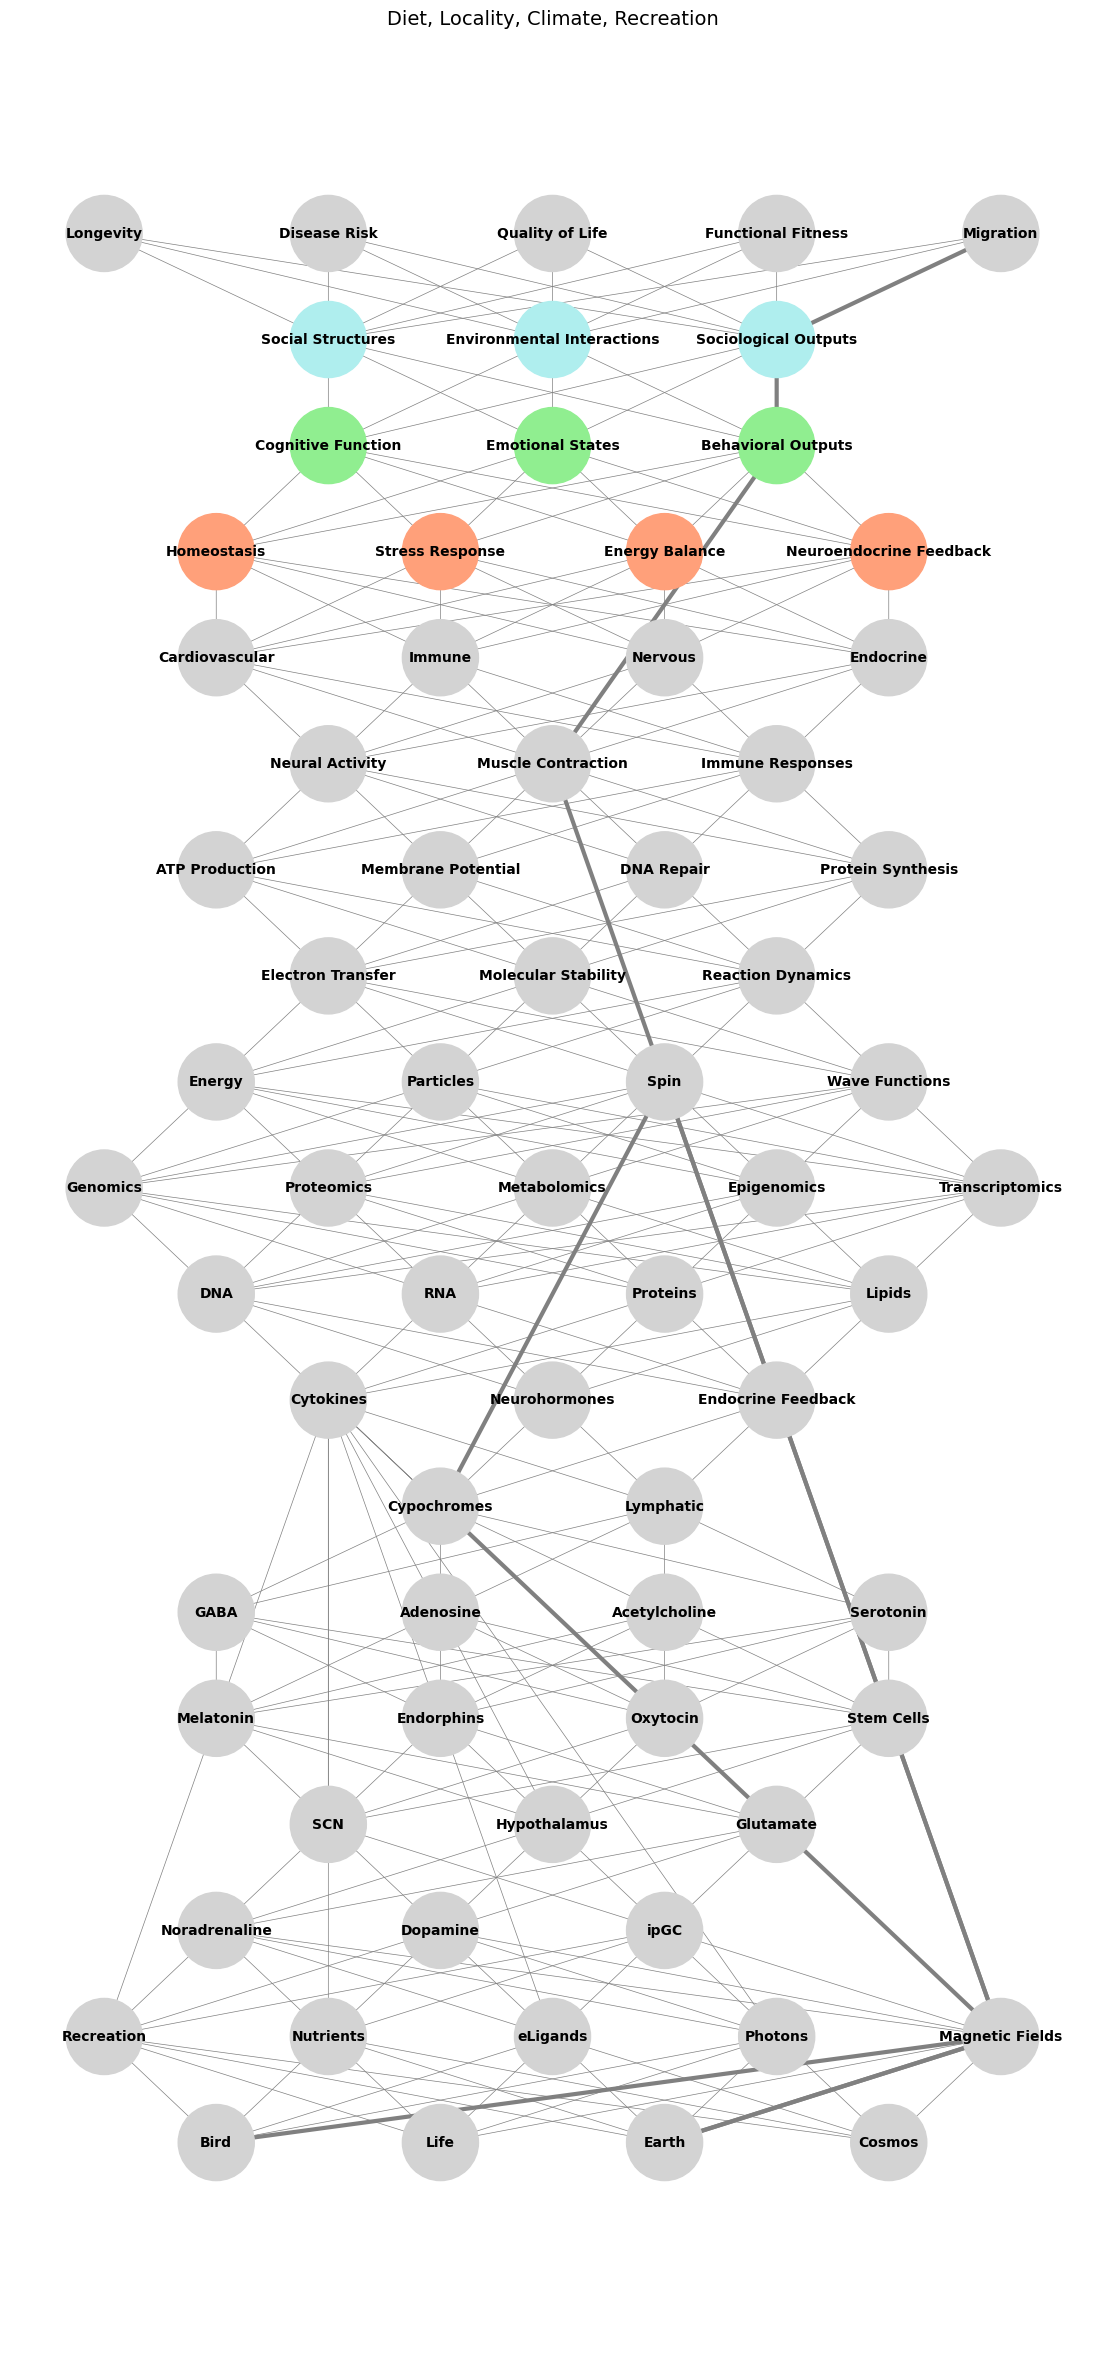

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Define layers for the input (compression) phase
input_layers = {
    "Biology": ['Bird', 'Life', 'Earth', 'Cosmos'],
    "Recreation and External Factors": ['Recreation', 'Nutrients', 'eLigands', 'Photons', 'Magnetic Fields'],
    "Ligands & Receptors": ['Noradrenaline', 'Dopamine', 'ipGC', 'Cytokines'],
    "Pathways": ['SCN', 'Hypothalamus', 'Glutamate'],
    "Cells": ['Melatonin', 'Endorphins', 'Oxytocin', 'Stem Cells'],
   "Tissues": ['GABA', 'Adenosine', 'Acetylcholine', 'Serotonin'],
    "Systems": [ 'Cypochromes', 'Lymphatic'],
    "Immuno-Neuro-Endocrinology": ['Cytokines', 'Neurohormones', 'Endocrine Feedback'],
    "Molecular Biology": ['DNA', 'RNA', 'Proteins', 'Lipids'],
    "Omics": ['Genomics', 'Proteomics', 'Metabolomics', 'Epigenomics', 'Transcriptomics'],
    "Quantum": ['Energy', 'Particles', 'Spin', 'Wave Functions']
}

# Define layers for the output (decompression) phase
output_layers = {
    "Molecular Outputs": ['Electron Transfer', 'Molecular Stability', 'Reaction Dynamics'],
    "Cellular Behavior": ['ATP Production', 'Membrane Potential', 'DNA Repair', 'Protein Synthesis'],
    "Tissue-Level Dynamics": ['Neural Activity', 'Muscle Contraction', 'Immune Responses'],
    "Organ Systems": ['Cardiovascular', 'Immune', 'Nervous', 'Endocrine'],
    "Physiological States": ['Homeostasis', 'Stress Response', 'Energy Balance', 'Neuroendocrine Feedback'],
    "Behavioral and Psychological Outcomes": ['Cognitive Function', 'Emotional States', 'Behavioral Outputs'],
    "Sociological and Environmental Interactions": ['Social Structures', 'Environmental Interactions', 'Sociological Outputs'],
    "Functional Health Outcomes": ['Longevity', 'Disease Risk', 'Quality of Life', 'Functional Fitness', 'Migration']
}

# Merge input and output layers
full_layers = {**input_layers, **output_layers}

# Initialize the graph
G_full_biology = nx.DiGraph()

# Add nodes for each layer
for layer_name, nodes in full_layers.items():
    G_full_biology.add_nodes_from(nodes, layer=layer_name)

# Connect layers sequentially
layer_names = list(full_layers.keys())
for i in range(len(layer_names) - 1):
    source_layer = full_layers[layer_names[i]]
    target_layer = full_layers[layer_names[i + 1]]
    for source_node in source_layer:
        for target_node in target_layer:
            G_full_biology.add_edge(source_node, target_node)

# Define node positions for visualization (inverted layout)
pos_full_biology = {}
layer_spacing = 2  # Space between layers
node_spacing = 1.5  # Space between nodes within a layer

for i, (layer_name, nodes) in enumerate(full_layers.items()):
    y = i * layer_spacing - (len(layer_names) - 1) * layer_spacing / 2  # Inverted vertical alignment
    for j, node in enumerate(nodes):
        x = j * node_spacing - (len(nodes) - 1) * node_spacing / 2  # Center nodes horizontally within layer
        pos_full_biology[node] = (x, y)

# Define specific colors for the Stress Dynamics pathway
highlighted_layers = {
    "Physiological States": "lightsalmon",
    "Behavioral and Psychological Outcomes": "lightgreen",
    "Sociological and Environmental Interactions": "paleturquoise"
}

node_colors = []
for node in G_full_biology.nodes():
    for layer_name, color in highlighted_layers.items():
        if node in full_layers[layer_name]:
            node_colors.append(color)
            break
    else:
        node_colors.append("lightgray")

# Highlight the Stress Pathway
stress_path = [
'Bird', 'Magnetic Fields',
'Earth', 'Magnetic Fields',
'Cypochromes',
'Spin', 'Magnetic Fields',
'Muscle Contraction',
'Behavioral Outputs',
'Sociological Outputs',
'Migration'
]

for i in range(len(stress_path) - 1):
    G_full_biology.add_edge(stress_path[i], stress_path[i + 1], weight=5)

edge_widths = []
for u, v in G_full_biology.edges():
    if (u, v) in zip(stress_path, stress_path[1:]):
        edge_widths.append(3)  # Highlighted path
    else:
        edge_widths.append(0.5)

# Draw the graph
plt.figure(figsize=(14, 30))
nx.draw_networkx_nodes(G_full_biology, pos_full_biology, node_size=3000, node_color=node_colors)
nx.draw_networkx_labels(G_full_biology, pos_full_biology, font_size=10, font_weight="bold")
nx.draw_networkx_edges(G_full_biology, pos_full_biology, width=edge_widths, edge_color="gray")
plt.title("Diet, Locality, Climate, Recreation", fontsize=14)
plt.axis('off')
plt.show()

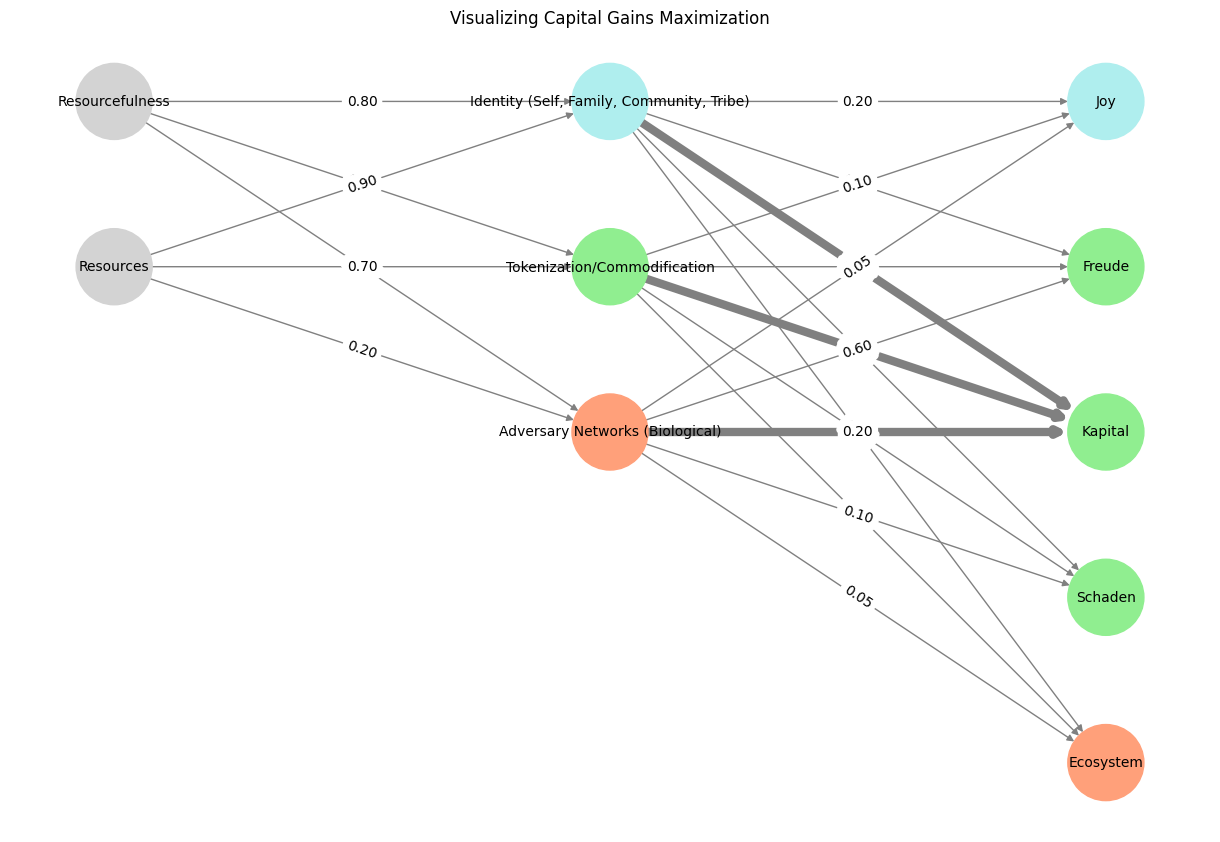

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
layers = {
    'Input': ['Resourcefulness', 'Resources'],
    'Hidden': [
        'Identity (Self, Family, Community, Tribe)',
        'Tokenization/Commodification', 
        'Adversary Networks (Biological)', 
    ],
    'Output': ['Joy', 'Freude', 'Kapital', 'Schaden', 'Ecosystem']
}

# Adjacency matrix defining the weight connections
weights = {
    'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
    'Hidden-Output': np.array([
        [0.2, 0.8, 0.1, 0.05, 0.2],
        [0.1, 0.9, 0.05, 0.05, 0.1],
        [0.05, 0.6, 0.2, 0.1, 0.05]
    ])
}

# Visualizing the Neural Network
def visualize_nn(layers, weights):
    G = nx.DiGraph()
    pos = {}
    node_colors = []

    # Add input layer nodes
    for i, node in enumerate(layers['Input']):
        G.add_node(node, layer=0)
        pos[node] = (0, -i)
        node_colors.append('lightgray')

    # Add hidden layer nodes
    for i, node in enumerate(layers['Hidden']):
        G.add_node(node, layer=1)
        pos[node] = (1, -i)
        if node == 'Identity (Self, Family, Community, Tribe)':
            node_colors.append('paleturquoise')
        elif node == 'Tokenization/Commodification':
            node_colors.append('lightgreen')
        elif node == 'Adversary Networks (Biological)':
            node_colors.append('lightsalmon')

    # Add output layer nodes
    for i, node in enumerate(layers['Output']):
        G.add_node(node, layer=2)
        pos[node] = (2, -i)
        if node == 'Joy':
            node_colors.append('paleturquoise')
        elif node in ['Freude', 'Kapital', 'Schaden']:
            node_colors.append('lightgreen')
        elif node == 'Ecosystem':
            node_colors.append('lightsalmon')

    # Add edges based on weights
    for i, in_node in enumerate(layers['Input']):
        for j, hid_node in enumerate(layers['Hidden']):
            G.add_edge(in_node, hid_node, weight=weights['Input-Hidden'][i, j])

    for i, hid_node in enumerate(layers['Hidden']):
        for j, out_node in enumerate(layers['Output']):
            # Adjust thickness for specific edges
            if hid_node == "Identity (Self, Family, Community, Tribe)" and out_node == "Kapital":
                width = 6
            elif hid_node == "Tokenization/Commodification" and out_node == "Kapital":
                width = 6
            elif hid_node == "Adversary Networks (Biological)" and out_node == "Kapital":
                width = 6
            else:
                width = 1
            G.add_edge(hid_node, out_node, weight=weights['Hidden-Output'][i, j], width=width)

    # Draw the graph
    plt.figure(figsize=(12, 8))
    edge_labels = nx.get_edge_attributes(G, 'weight')
    widths = [G[u][v]['width'] if 'width' in G[u][v] else 1 for u, v in G.edges()]
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray', 
        node_size=3000, font_size=10, width=widths
    )
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title("Visualizing Capital Gains Maximization")
    plt.show()

visualize_nn(layers, weights)

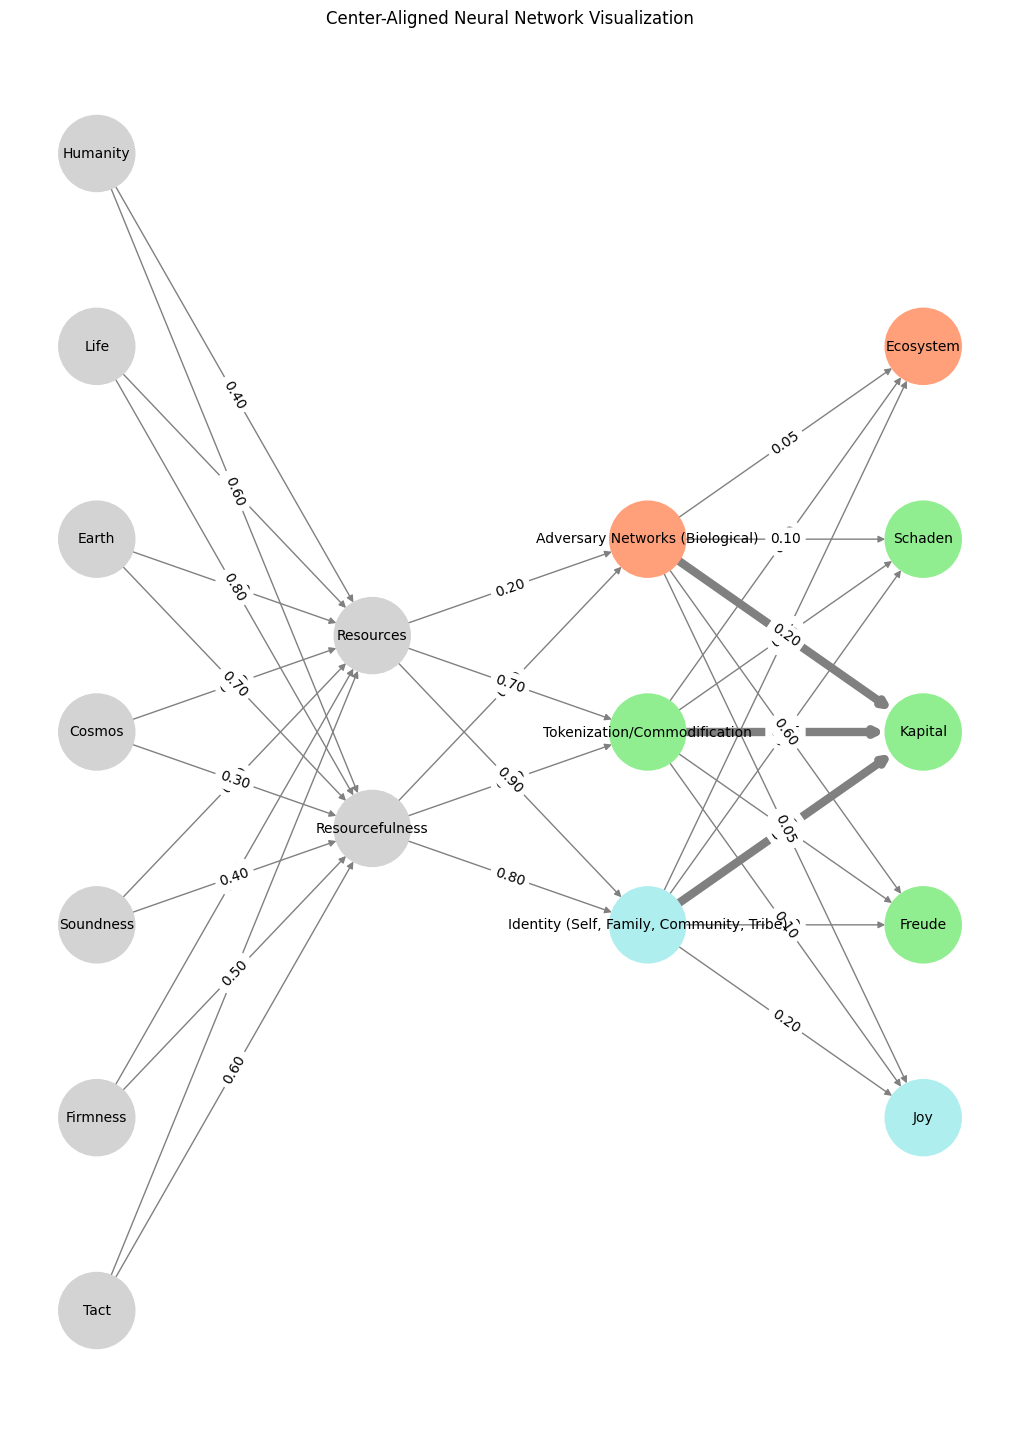

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
layers = {
    'Pre-Input': ['Tact', 'Firmness', 'Soundness', 'Cosmos', 'Earth', 'Life', 'Humanity'],
    'Input': ['Resourcefulness', 'Resources'],
    'Hidden': [
        'Identity (Self, Family, Community, Tribe)',
        'Tokenization/Commodification',
        'Adversary Networks (Biological)',
    ],
    'Output': ['Joy', 'Freude', 'Kapital', 'Schaden', 'Ecosystem']
}

# Define weights for the connections
weights = {
    'Pre-Input-Input': np.array([
        [0.6, 0.7],
        [0.5, 0.8],
        [0.4, 0.6],
        [0.3, 0.5],
        [0.7, 0.3],
        [0.8, 0.2],
        [0.6, 0.4]
    ]),
    'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
    'Hidden-Output': np.array([
        [0.2, 0.8, 0.1, 0.05, 0.2],
        [0.1, 0.9, 0.05, 0.05, 0.1],
        [0.05, 0.6, 0.2, 0.1, 0.05]
    ])
}

# Visualization function
def visualize_nn_center_aligned(layers, weights):
    G = nx.DiGraph()
    pos = {}
    node_colors = []

    # Define a fixed x-axis coordinate for alignment
    center_x = 0

    # Calculate the vertical positions for each node in a layer
    def calculate_y_positions(layer):
        layer_size = len(layer)
        start_y = -(layer_size - 1) / 2  # Center the layer vertically
        return [start_y + i for i in range(layer_size)]

    # Add pre-input layer nodes
    y_positions = calculate_y_positions(layers['Pre-Input'])
    for i, node in enumerate(layers['Pre-Input']):
        G.add_node(node, layer=-1)
        pos[node] = (center_x - 3, y_positions[i])  # Shift x-axis to left
        node_colors.append('lightgray')

    # Add input layer nodes
    y_positions = calculate_y_positions(layers['Input'])
    for i, node in enumerate(layers['Input']):
        G.add_node(node, layer=0)
        pos[node] = (center_x - 2, y_positions[i])
        node_colors.append('lightgray')

    # Add hidden layer nodes
    y_positions = calculate_y_positions(layers['Hidden'])
    for i, node in enumerate(layers['Hidden']):
        G.add_node(node, layer=1)
        pos[node] = (center_x - 1, y_positions[i])
        if node == 'Identity (Self, Family, Community, Tribe)':
            node_colors.append('paleturquoise')
        elif node == 'Tokenization/Commodification':
            node_colors.append('lightgreen')
        elif node == 'Adversary Networks (Biological)':
            node_colors.append('lightsalmon')

    # Add output layer nodes
    y_positions = calculate_y_positions(layers['Output'])
    for i, node in enumerate(layers['Output']):
        G.add_node(node, layer=2)
        pos[node] = (center_x, y_positions[i])
        if node == 'Joy':
            node_colors.append('paleturquoise')
        elif node in ['Freude', 'Kapital', 'Schaden']:
            node_colors.append('lightgreen')
        elif node == 'Ecosystem':
            node_colors.append('lightsalmon')

    # Add edges for Pre-Input to Input
    for i, pre_node in enumerate(layers['Pre-Input']):
        for j, in_node in enumerate(layers['Input']):
            G.add_edge(pre_node, in_node, weight=weights['Pre-Input-Input'][i, j])

    # Add edges for Input to Hidden
    for i, in_node in enumerate(layers['Input']):
        for j, hid_node in enumerate(layers['Hidden']):
            G.add_edge(in_node, hid_node, weight=weights['Input-Hidden'][i, j])

    # Add edges for Hidden to Output
    for i, hid_node in enumerate(layers['Hidden']):
        for j, out_node in enumerate(layers['Output']):
            # Adjust thickness for specific edges
            if hid_node == "Identity (Self, Family, Community, Tribe)" and out_node == "Kapital":
                width = 6
            elif hid_node == "Tokenization/Commodification" and out_node == "Kapital":
                width = 6
            elif hid_node == "Adversary Networks (Biological)" and out_node == "Kapital":
                width = 6
            else:
                width = 1
            G.add_edge(hid_node, out_node, weight=weights['Hidden-Output'][i, j], width=width)

    # Draw the graph
    plt.figure(figsize=(10, 14))
    edge_labels = nx.get_edge_attributes(G, 'weight')
    widths = [G[u][v]['width'] if 'width' in G[u][v] else 1 for u, v in G.edges()]
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, width=widths
    )
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title("Center-Aligned Neural Network Visualization")
    plt.show()

visualize_nn_center_aligned(layers, weights)


```{figure} ../../figures/blanche.*
---
width: 1
height: 1
---
_A Unified Model_. To create one that integrates the biological and environmental layers with the abstract societal and economic dynamics, we'd highlight key pathways and weights, demonstrating how the layers interconnect across domains. Resource, for instance, at the input are cosmos, earth, life, humanity. The color codes capture eros (blue), hypnos (green), and red (thanatos) -- our post-Freudian dynamic [beyond the pleasure principle](https://www.sas.upenn.edu/~cavitch/pdf-library/Freud_Beyond_P_P.pdf)
```